# Machine Learning From Disaster: Prevendo Sobreviventes do Titanic

Classificar se o passageiro sobreviveu ou não ao Titanic com base nos dados informados. Projeto realizado como exercício do livro Hands-On Machine Learning.

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
treino = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

In [3]:
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


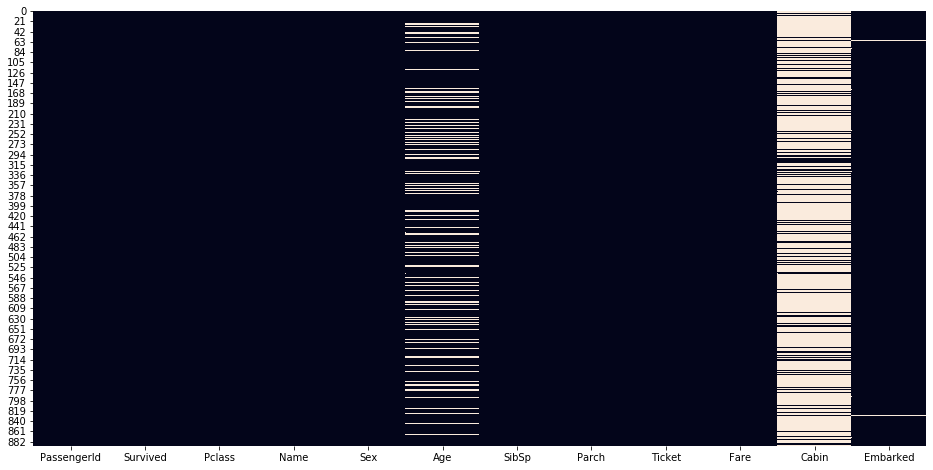

In [7]:
plt.figure(figsize=(16,8))

sns.heatmap(treino.isnull(), cbar=False)

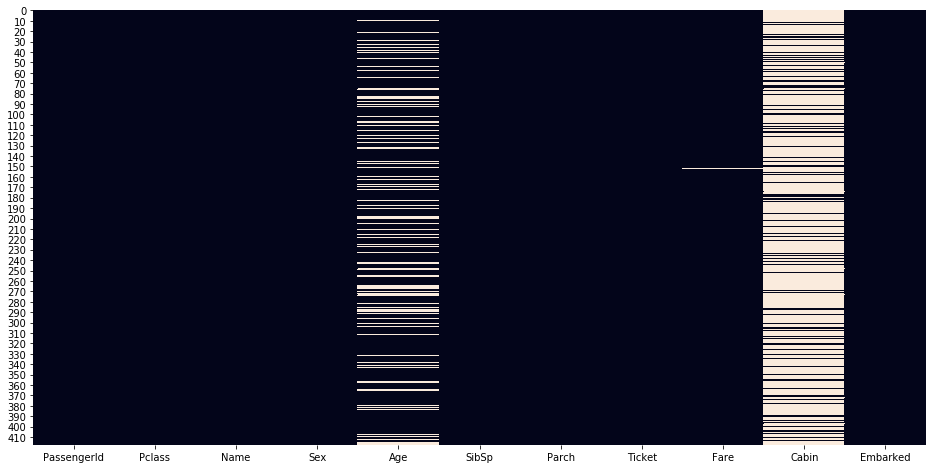

In [8]:
plt.figure(figsize=(16,8))

sns.heatmap(teste.isnull(), cbar=False)

Pelos gráficos nota-se que há muitos valores faltantes nos atributos 'Age', 'Cabin'. As colunas 'Name', 'Id' e 'Ticket' não acrescentam informação relevante ao problema, vamos excluí-las. O mesmo será feito por 'Cabin', uma vez que há mais valores faltantes do que dados neste atributo. Para as colunas 'Fare' e 'Embarked' que contem valores faltantes, serão dropadas as respectivas linhas, uma vez que são minoria.

In [9]:
treino = treino.drop(['Name','PassengerId','Cabin','Ticket'], axis=1)
teste = teste.drop(['Name','PassengerId','Cabin','Ticket'], axis=1)

treino = treino.dropna(subset=['Embarked','Fare'], axis=0)
teste = teste.dropna(subset=['Embarked','Fare'], axis=0)

In [10]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [11]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    417 non-null    int64  
 1   Sex       417 non-null    object 
 2   Age       331 non-null    float64
 3   SibSp     417 non-null    int64  
 4   Parch     417 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  417 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


In [12]:
# guarda nomes dos atributos numéricos

numericas = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

atributos_numericos = list(teste.select_dtypes(include=numericas))

categoricas = ['object']

atributos_categoricos = list(treino.select_dtypes(include=categoricas))

In [13]:
atributos_numericos

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [14]:
atributos_categoricos

['Sex', 'Embarked']

# Análise Exploratória e Feature Engineering

Inicialmente, vamos determinar as idades faltantes com um algoritmo de machine learning de regressão.

In [15]:
df = [treino.drop(['Survived'], axis=1).copy(), teste.copy()]
dados_gerais = pd.concat(df)
dados_gerais.head(-10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
403,1,male,17.0,0,0,47.1000,S
404,1,male,43.0,1,0,27.7208,C
405,2,male,20.0,0,0,13.8625,C
406,2,male,23.0,1,0,10.5000,S


In [16]:
dados_gerais.head()

atributos_numericos.remove('Age')

atributos_numericos.remove('Pclass')

atributos_categoricos.append('Pclass')


In [17]:
print(atributos_numericos)
print(atributos_categoricos)

['SibSp', 'Parch', 'Fare']
['Sex', 'Embarked', 'Pclass']


# Cria Pipeline para Tratar Variáveis Categóricas e Numéricas

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer


cat_pipeline = Pipeline([('one_hot',OneHotEncoder())])

num_pipeline = Pipeline([('std_scaler',StandardScaler())])

full_pipeline = ColumnTransformer([('num',num_pipeline,atributos_numericos),('cat',cat_pipeline,atributos_categoricos)])

dados_preparados = full_pipeline.fit_transform(dados_gerais)


In [19]:
from sklearn.model_selection import train_test_split


x_treino = dados_preparados[~dados_gerais['Age'].isnull()].copy()

y_treino = dados_gerais['Age'][~dados_gerais['Age'].isnull()].values.copy()

X_treino, X_teste, Y_treino, Y_teste = train_test_split(x_treino,y_treino, test_size=0.3, random_state=42)

x_prever = dados_preparados[dados_gerais['Age'].isnull()]



# Avalia Melhor Modelo com Validação Cruzada Para Prever Idades Faltantes

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score


print('Scores de Treino com Validação Cruzada: ','\n')


rf_reg = cross_val_score(RandomForestRegressor(), X_treino, Y_treino, scoring='neg_mean_squared_error', cv= 5)

print('Random Forest Regressor Score - ', 'Média: ',np.mean(np.sqrt(-rf_reg)),'Desvio Padrão: ', np.std(np.sqrt(-rf_reg)))

knn_reg = cross_val_score(KNeighborsRegressor(n_neighbors=7), X_treino, Y_treino, scoring='neg_mean_squared_error', cv= 5)

print('KNN Regressor - ', 'Média: ',np.mean(np.sqrt(-knn_reg)),'Desvio Padrão: ', np.std(np.sqrt(-knn_reg)))

l_reg = cross_val_score(LinearRegression(), X_treino, Y_treino, scoring='neg_mean_squared_error', cv= 5)

print('Linear Regression - ', 'Média: ',np.mean(np.sqrt(-l_reg)),'Desvio Padrão: ', np.std(np.sqrt(-l_reg)),'\n')

knn = KNeighborsRegressor(n_neighbors=7)

knn.fit(X_treino, Y_treino)

y_teste_knn = knn.predict(X_teste)

rf = RandomForestRegressor()

rf.fit(X_treino, Y_treino)

y_teste_rf = rf.predict(X_teste)

l_r = LinearRegression()

l_r.fit(X_treino, Y_treino)

y_teste_lr = l_r.predict(X_teste)

from sklearn.metrics import mean_squared_error


print('Scores de Validação: ','\n')

print('Random Forest: ', np.sqrt(mean_squared_error(y_teste_rf,Y_teste)))


print('Linear Regression: ', np.sqrt(mean_squared_error(y_teste_lr,Y_teste)))


print('KNN Regressor: ' , np.sqrt(mean_squared_error(y_teste_knn,Y_teste)))



y_age = l_r.predict(x_prever)

Scores de Treino com Validação Cruzada:  

Random Forest Regressor Score -  Média:  12.823128321077442 Desvio Padrão:  1.09901310667307
KNN Regressor -  Média:  12.524948535070582 Desvio Padrão:  0.6087925145626218
Linear Regression -  Média:  12.453765516340708 Desvio Padrão:  0.736651370449759 

Scores de Validação:  

Random Forest:  13.184253967233241
Linear Regression:  13.214064277744782
KNN Regressor:  13.340625114449661


In [21]:
treino['Age'][treino['Age'].isnull()] = y_age[:177]

In [22]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [23]:
teste['Age'][teste['Age'].isnull()] = y_age[177:263]

In [24]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    417 non-null    int64  
 1   Sex       417 non-null    object 
 2   Age       417 non-null    float64
 3   SibSp     417 non-null    int64  
 4   Parch     417 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  417 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


# Análise Exploratória

Text(0.5, 1.0, 'BoxPlot de Sexo por Idade Separado por Classe')

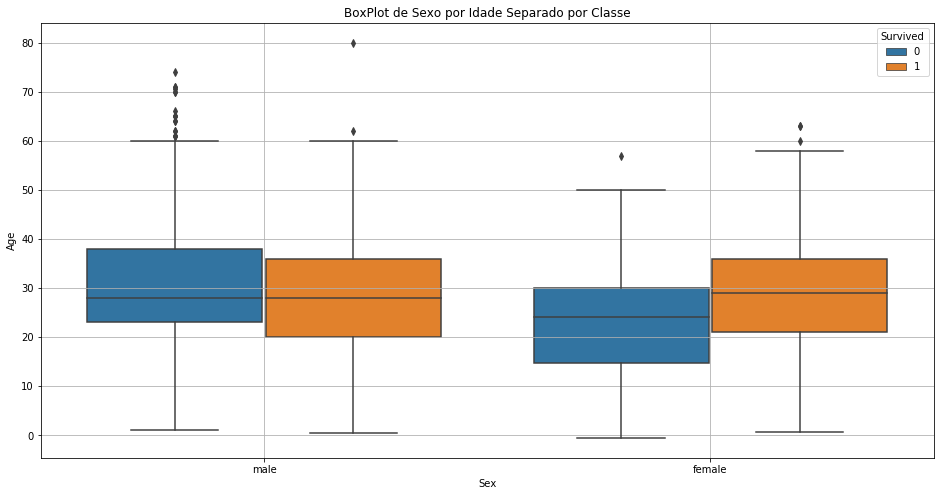

In [25]:
plt.figure(figsize=(16,8))

sns.boxplot(x="Sex", y="Age", hue='Survived', data=treino)

plt.grid()

plt.title('BoxPlot de Sexo por Idade Separado por Classe')

Text(0.5, 1.0, 'Histograma de Frequências de Idade Separadas por Classe')

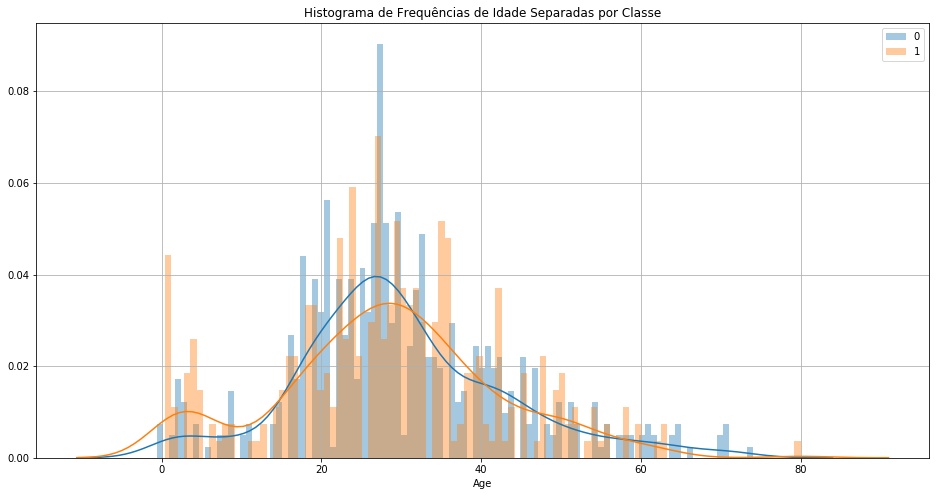

In [26]:
plt.figure(figsize=(16,8))

classes = [0,1]

for classe in classes:

    sns.distplot(treino['Age'][treino['Survived']==classe],bins=100,label=classe)
                               
plt.legend() 
plt.grid()
plt.title('Histograma de Frequências de Idade Separadas por Classe')

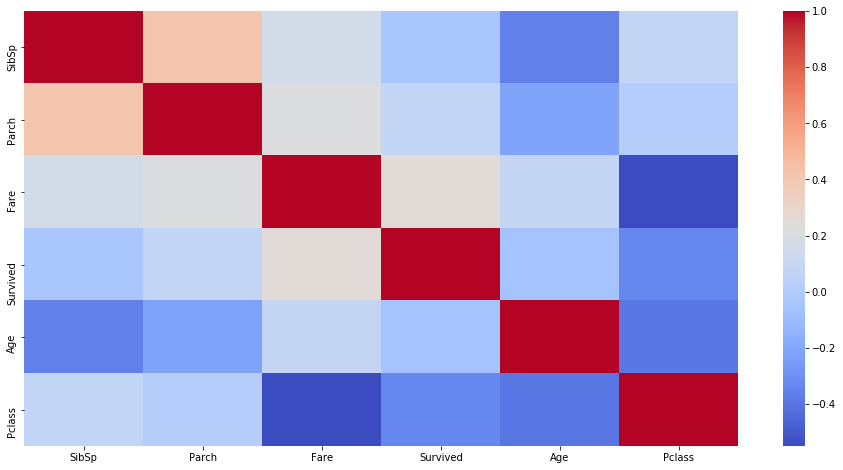

In [27]:
atributos_numericos.append('Survived')
atributos_numericos.append('Age')
atributos_numericos.append('Pclass')


plt.figure(figsize=(16,8))
sns.heatmap(treino[atributos_numericos].corr(), cmap='coolwarm')

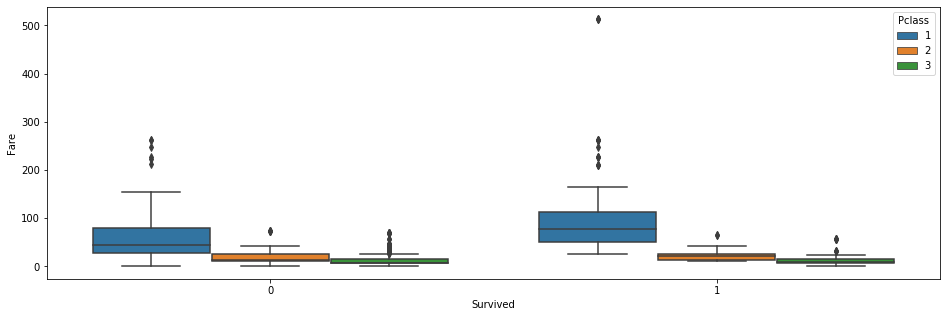

In [28]:
plt.figure(figsize=(16,5))

sns.boxplot(x='Survived',y='Fare', hue='Pclass',data=treino)

In [29]:
pd.pivot_table(treino[['Survived','Pclass','Sex']], index=['Survived','Sex'],columns=['Pclass'],aggfunc=len)

Pclass            1   2    3
Survived Sex                
0        female   3   6   72
         male    77  91  300
1        female  89  70   72
         male    45  17   47

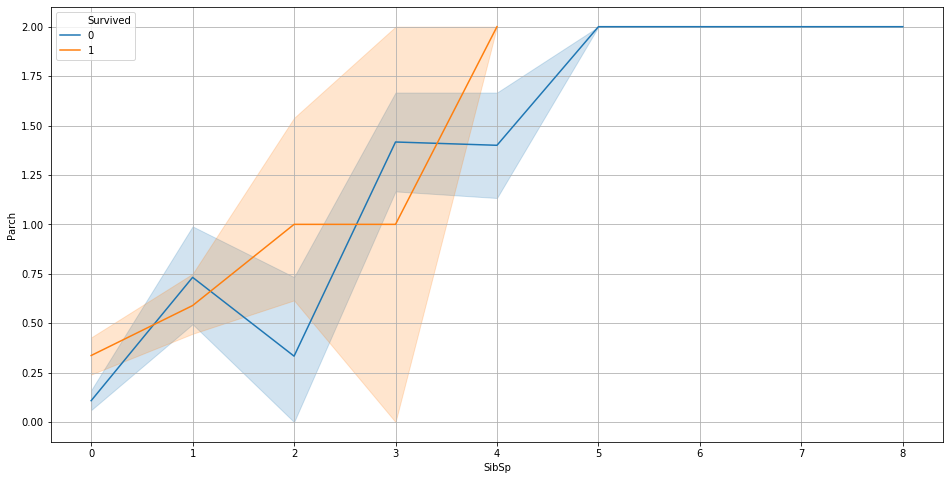

In [30]:
plt.figure(figsize=(16,8))

sns.lineplot(data=treino,x='SibSp',y='Parch',hue='Survived')

plt.grid()

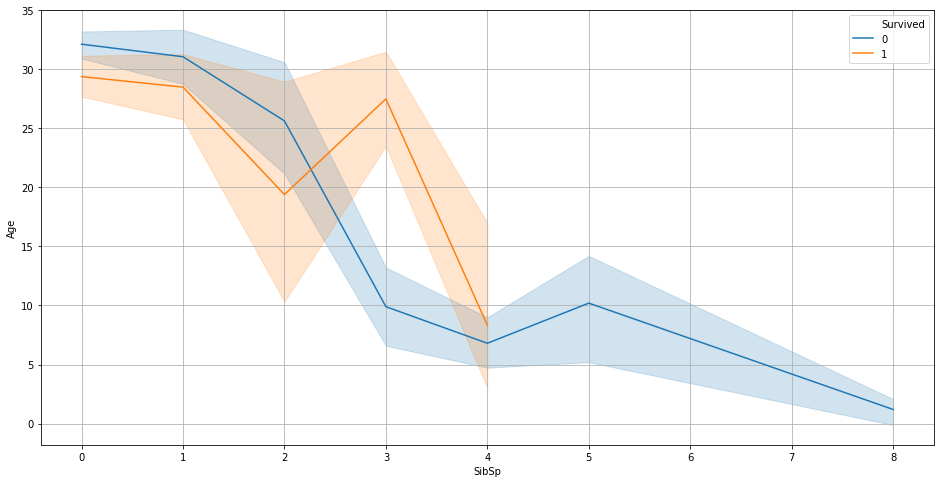

In [31]:
plt.figure(figsize=(16,8))

sns.lineplot(data=treino,x='SibSp',y='Age',hue='Survived')

plt.grid()

# Modelos de Machine Learning

In [32]:
x_train = treino.drop(['Survived'], axis=1).copy()

y_train = treino['Survived'].copy()

x_prever = teste.copy()

In [33]:
atributos_numericos.remove('Pclass')
atributos_categoricos.append('Pclass')
atributos_numericos.remove('Survived')

In [34]:
atributos_numericos

['SibSp', 'Parch', 'Fare', 'Age']

In [35]:
atributos_categoricos

['Sex', 'Embarked', 'Pclass', 'Pclass']

In [36]:
cat_pipeline = Pipeline([('one_hot', OneHotEncoder())])

num_pipeline = Pipeline([('std_scaler', StandardScaler())])

full_pipeline = ColumnTransformer([('num',num_pipeline,atributos_numericos),('cat',cat_pipeline,atributos_categoricos)])

full_pipeline.fit(x_train)

x_train_pip = full_pipeline.transform(x_train)

x_prever = full_pipeline.transform(x_prever)

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(x_train_pip,y_train, test_size=0.33, random_state=42, shuffle=True)

In [41]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_val_predict

from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_auc_score

from sklearn.metrics import plot_precision_recall_curve

from sklearn.metrics import plot_roc_curve

from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score

sk = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# 1º Classificador: Support Vector Machines

In [59]:
svm_grid = {
    
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [1, 10, 100, 1000],
    'degree': [2, 3, 4, 5, 7],
    'gamma': ['scale', 'auto'],
    'class_weight':[None, 'balanced']
    
        }

In [60]:
from sklearn.model_selection import GridSearchCV

clf_svc = GridSearchCV(SVC(), svm_grid, cv=sk, verbose=1,scoring='f1_weighted')

resultados_svc = clf_svc.fit(X_TRAIN,Y_TRAIN)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed: 10.3min finished


In [61]:
print('Melhor Estimador:\n')
print(resultados_svc.best_estimator_)

print('Melhor F1-Weighted:\n')
print(resultados_svc.best_score_)

Melhor Estimador:

SVC(C=100, degree=4, gamma='auto', kernel='poly')
Melhor F1-Weighted:

0.8296400812781913


In [106]:
resultados_svc.best_estimator_.fit(X_TRAIN, Y_TRAIN)

Y_PRED_SVC = resultados_svc.best_estimator_.predict(X_TEST)

# 2º Classificador: Logistic Regression

In [103]:
lr_grid = {
    
    'penalty': ['l1', 'l2'],
    'C': [1, 10, 100, 1000],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'class_weight':[None, 'balanced']

        }

In [104]:
clf_lr = GridSearchCV(LogisticRegression(), lr_grid, cv=sk, verbose=1,scoring='f1_weighted')

resultados_lr = clf_lr.fit(X_TRAIN,Y_TRAIN)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.2s finished


In [105]:
print('Melhor Estimador:\n')
print(resultados_lr.best_estimator_)

print('Melhor F1-Weighted:\n')
print(resultados_lr.best_score_)

Melhor Estimador:

LogisticRegression(C=1, penalty='l1', solver='liblinear')
Melhor F1-Weighted:

0.7953522102927401


In [114]:
resultados_lr.best_estimator_.fit(X_TRAIN, Y_TRAIN)

Y_PRED_LR= resultados_lr.best_estimator_.predict(X_TEST)

# 3º Classificador: KNN

In [118]:
knn_grid = {
    
    'n_neighbors': [3, 5, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['manhattan', 'euclidean']
            }

In [120]:
clf_knn = GridSearchCV(KNeighborsClassifier(), knn_grid, cv=sk, verbose=1,scoring='f1_weighted')

resultados_knn = clf_knn.fit(X_TRAIN,Y_TRAIN)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.4s finished


In [ ]:
print('Melhor Estimador:\n')
print(resultados_knn.best_estimator_)

print('Melhor F1-Weighted:\n')
print(resultados_knn.best_score_)

In [121]:
resultados_knn.best_estimator_.fit(X_TRAIN, Y_TRAIN)

Y_PRED_KNN= resultados_knn.best_estimator_.predict(X_TEST)

# 4º Classificador: Naive Bayes

In [124]:
clf_nb = GaussianNB()

clf_nb.fit(X_TRAIN, Y_TRAIN)

Y_PRED_NB = clf_nb.predict(X_TEST)

# 5º Classificador: Random Forest

In [128]:
rf_grid = {
  
    'bootstrap': [True],
    'max_depth': [30, 80, 90, 100, 110],
    'max_features': [2, 3, 5, 10],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
    
     }

In [131]:
from sklearn.model_selection import RandomizedSearchCV

clf_rf = RandomizedSearchCV(RandomForestClassifier(), rf_grid, cv=sk, verbose=1,scoring='f1_weighted')

resultados_rf = clf_rf.fit(X_TRAIN,Y_TRAIN)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   26.8s finished


In [132]:
print('Melhor Estimador:\n')
print(resultados_rf.best_estimator_)

print('Melhor F1-Weighted:\n')
print(resultados_rf.best_score_)

Melhor Estimador:

RandomForestClassifier(max_depth=100, max_features=5, min_samples_leaf=3,
                       min_samples_split=10)
Melhor F1-Weighted:

0.8349966557648028


In [133]:
resultados_rf.best_estimator_.fit(X_TRAIN, Y_TRAIN)

Y_PRED_RF = resultados_rf.best_estimator_.predict(X_TEST)

# Análise das Curvas: ROC, Precision-Recall e Matriz de Confusão

In [115]:
def plota_pr_roc_confmat(modelo_, x_test_, y_test_, y_pred_):
    
    
    fig, axes = plt.subplots(ncols=3, figsize=(16,5))

    plot_precision_recall_curve(modelo_, x_test_, y_test_, y_pred_, ax=axes[0], color='purple')
    
    plot_roc_curve(modelo_,x_test_, y_test_,ax = axes[1], color='blue')
    
    conf_matr = confusion_matrix(y_test_, y_pred_)
    
    grupos = ['Verd Pos','Falso Pos','Falso Neg','Verd Pos']
    
    sns.heatmap(conf_matr,annot=True,cmap='viridis', alpha=.55, ax=axes[2], cbar=True, fmt='', linewidth=1,linecolor='black')
    
    plt.title('Matrix de Confusão do Modelo')
    
    axes[0].set_title('Curva Precision-Recall do Modelo')
    
    axes[1].set_title('Curva ROC do Modelo')
    
    axes[1].plot([1,0],[1,0], c='red',ls='--')
    
       
    scores = {}
    scores['Classificador'] = modelo_
    scores['Acurácia'] = accuracy_score(y_test_, y_pred_)
    scores['ROC_AUC_Score']=roc_auc_score(y_test_, y_pred_)
    scores['F1_Score_Weighted'] = f1_score(y_test_,y_pred_,average='weighted')

    print(scores)

# SVC

{'Classificador': SVC(C=100, degree=4, gamma='auto', kernel='poly'), 'Acurácia': 0.8095238095238095, 'ROC_AUC_Score': 0.7801877470355731, 'F1_Score_Weighted': 0.805478401282023}


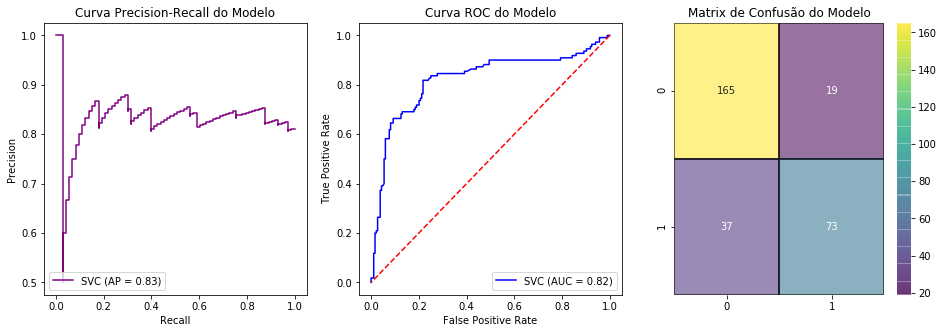

In [116]:
plota_pr_roc_confmat(resultados_svc.best_estimator_, X_TEST, Y_TEST, Y_PRED)

# Logistic Regression

{'Classificador': LogisticRegression(C=1, penalty='l1', solver='liblinear'), 'Acurácia': 0.8299319727891157, 'ROC_AUC_Score': 0.816600790513834, 'F1_Score_Weighted': 0.8296114875407143}


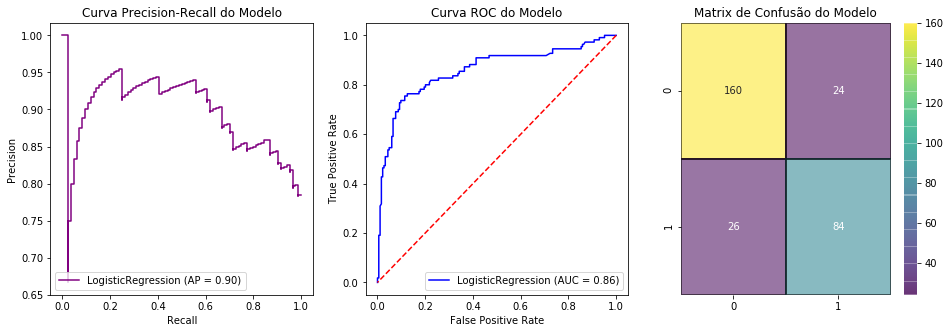

In [117]:
plota_pr_roc_confmat(resultados_lr.best_estimator_, X_TEST, Y_TEST, Y_PRED_LR)

# KNN

{'Classificador': KNeighborsClassifier(metric='manhattan', n_neighbors=19, weights='distance'), 'Acurácia': 0.7721088435374149, 'ROC_AUC_Score': 0.7576086956521739, 'F1_Score_Weighted': 0.7723139559743412}


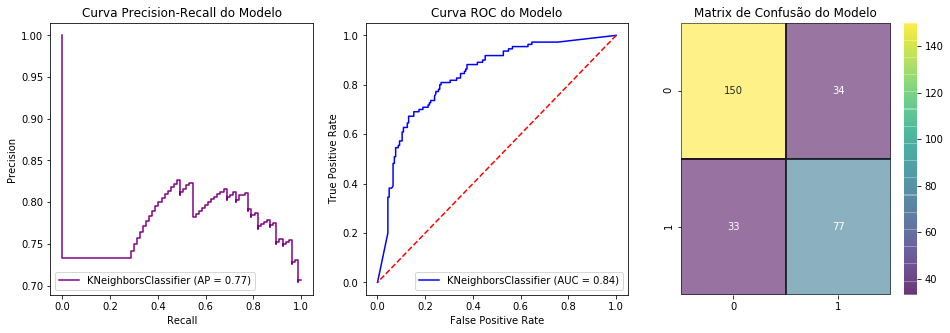

In [126]:
plota_pr_roc_confmat(resultados_knn.best_estimator_, X_TEST, Y_TEST, Y_PRED_KNN)

# Naive Bayes

{'Classificador': GaussianNB(), 'Acurácia': 0.7687074829931972, 'ROC_AUC_Score': 0.782312252964427, 'F1_Score_Weighted': 0.772378792786956}


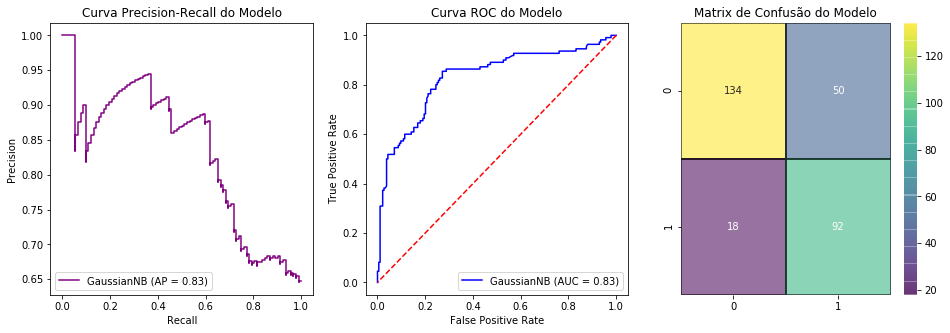

In [127]:
plota_pr_roc_confmat(clf_nb, X_TEST, Y_TEST, Y_PRED_NB)

# Random Forest

{'Classificador': RandomForestClassifier(max_depth=100, max_features=5, min_samples_leaf=3,
                       min_samples_split=10), 'Acurácia': 0.8197278911564626, 'ROC_AUC_Score': 0.7974802371541502, 'F1_Score_Weighted': 0.8175999743044003}


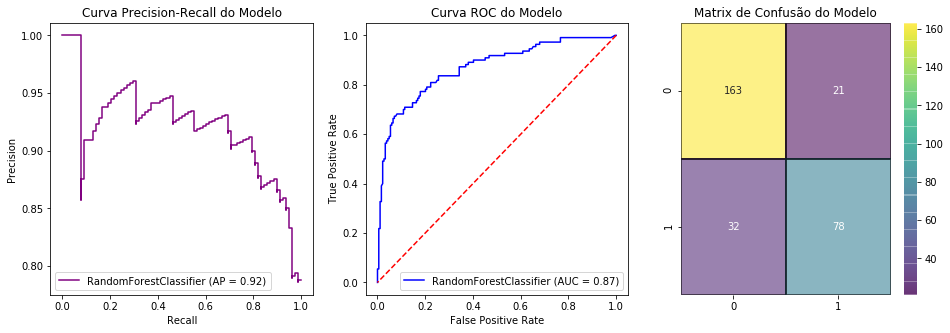

In [134]:
plota_pr_roc_confmat(resultados_rf.best_estimator_, X_TEST, Y_TEST, Y_PRED_RF)

# Resultado

O modelo escolhido será o de Regressão logística, uma vez que apresentou indicadores desempenhos superiores aos demais.